In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import csv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [59]:
os.chdir(r'E:\Learning\Digit Recognizer')

In [100]:
def reader_function(file_name):
    with open(file_name) as csv_reader:
    
        csv_file = csv.reader(csv_reader)
        next(csv_file)
        images = []
        labels = []
        for row in csv_file:
            labels.append(row[0])
            images.append(np.array(row[1:]).reshape(28,28))
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(int)
    return images,labels

        
        

In [101]:
image,label = reader_function('train.csv')
image_training,image_validation,label_training,label_validation = train_test_split(image,label,test_size = 0.01)

In [102]:
image_training.shape

(41580, 28, 28)

In [103]:
image_training = np.expand_dims(image_training,axis = 3)
image_validation = np.expand_dims(image_validation,axis = 3)
print(len(image_training))
print(len(image_validation))
print(len(label_training))
print(len(label_validation))

41580
420
41580
420


In [131]:

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   zoom_range = 0.2,
                                  featurewise_center=True,
                                  samplewise_center=True,
                                  zca_whitening=True)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)
train_generator = train_datagen.flow(image_training,label_training,batch_size = 100)
validation_generator =  validation_datagen.flow(image_validation,label_validation,batch_size = 100)

In [132]:
# resnet_model = tf.keras.models.Sequential()
# resnet = ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet')
# resnet_model.add(resnet)
# resnet_model.layers[0].trainable = False
# resnet_model.add(tf.keras.layers.Flatten())
# resnet_model.add(tf.keras.layers.)
# resnet_model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
# resnet_model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])
# resnet_model.fit_generator(train_generator,validation_data = validation_generator,epochs = 10)

In [136]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),input_shape = (28,28,1),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   tf.keras.layers.Dense(256,activation = 'relu'),
                                   tf.keras.layers.Dense(10,activation = 'softmax')])
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])
model.fit_generator(train_generator,validation_data = validation_generator,epochs = 10)

Epoch 1/10
416/416 [==============================] - 27s 63ms/step - loss: 0.5486 - accuracy: 0.8180 - val_loss: 0.1184 - val_accuracy: 0.9690
Epoch 2/10
416/416 [==============================] - 26s 63ms/step - loss: 0.0669 - accuracy: 0.9785 - val_loss: 0.1261 - val_accuracy: 0.9690
Epoch 3/10
416/416 [==============================] - 27s 64ms/step - loss: 0.0414 - accuracy: 0.9860 - val_loss: 0.1352 - val_accuracy: 0.9738
Epoch 4/10
416/416 [==============================] - 27s 64ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.1076 - val_accuracy: 0.9786
Epoch 5/10
416/416 [==============================] - 27s 64ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.1090 - val_accuracy: 0.9857
Epoch 6/10
416/416 [==============================] - 27s 65ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.1199 - val_accuracy: 0.9762
Epoch 7/10
416/416 [==============================] - 27s 64ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0820 - val_accuracy:

In [108]:
model.predict_classes(image_validation)[:50]

array([2, 1, 9, 4, 8, 8, 8, 4, 8, 2, 5, 7, 8, 8, 0, 8, 8, 8, 7, 5, 6, 8,
       1, 8, 4, 8, 2, 8, 0, 8, 8, 7, 8, 1, 4, 8, 2, 7, 8, 8, 6, 6, 6, 7,
       0, 0, 1, 8, 7, 8], dtype=int64)

In [137]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label_validation,model.predict_classes(image_validation),labels = range(10))

array([[45,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1, 26,  0,  8,  0,  1, 13,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  3,  0],
       [ 1,  0,  0,  0,  0, 36,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  5, 33]], dtype=int64)

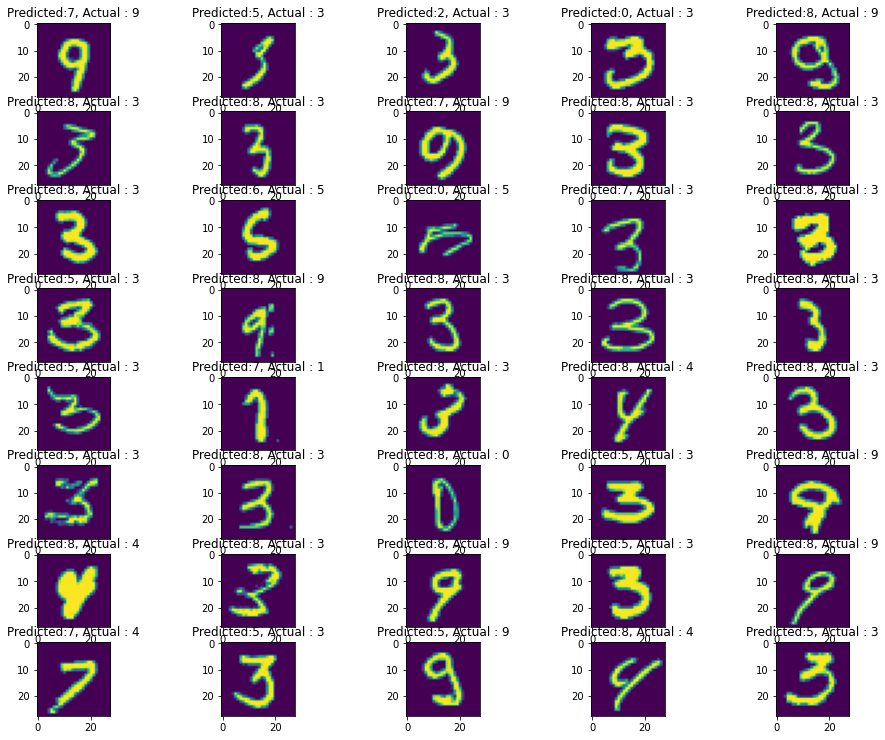

In [138]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16, 16))
columns = 5
rows = 10
i=1
j=0
for x,y in zip(model.predict_classes(image_validation),label_validation):
    if y!=x:
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(image_validation[j,:,:,0])
        plt.title(f'Predicted:{x}, Actual : {y}')
        i+=1
    j+=1
plt.show()

In [139]:
test_images = pd.read_csv('test.csv')

In [140]:
image_testing = []
for row in range(len(test_images)):
    image_testing.append(np.array(test_images.loc[row,]).reshape(28,28))

In [141]:
image_testing = np.array(image_testing).astype(float)
image_testing = np.expand_dims(image_testing,axis = 3)

In [142]:
model.predict_classes(image_testing/255.0)

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [143]:
prediction = model.predict_classes(image_testing/255.0)

In [144]:
pd.DataFrame(prediction).to_csv('result3.csv')